## Instructions:

Due:  Monday, April 25, at 9am.

Complete these three question in three separate notebooks.  You can use any materials you can find including
the class notebooks (be sure and give the source of anything that's not your own work and not in our github repository):  http://clouds.eos.ubc.ca/~phil/courses/atsc212/notebook_index.html.  Hand in via a dropbox (or other file sharing service) url (email it to me).  In your email -- include 3 possible 30 minute slots sometime next week where we can go over your solutions.

Make sure that your functions follow the code guidelines of Day 8/bessel_fun.py



In [65]:
from numpy import random
random.seed(10)
size=int(8.e4)
values = random.random_sample([size])
values=values*1000.

### 1\.  Histogram

Write a function that takes a 1-d vector of values and a vector of bins and returns a histogram vector with the number of values that fall into each bin.  Test your function by using it to bin the 80,000 values in the cell above into 20 bins with left edge at 100 and right edge at 900.  Note that you will need to assign a "under_bin" and an "over_bin" for values that fall outside of that range.   Make your function signature:

```
my_hist(values, bins, under_bins= -1000, over_bins = -999)
```

Your routine should not use any numpy or matplotlib functions, only straight python -- i.e. for loops, if/elif/else, sort are ok,  numpy.histogram not so much.

Make an xy plot of your result, with bins on the x axis and counts on the y axis.

### 2\. Histogram solution


[(0, 3500)]

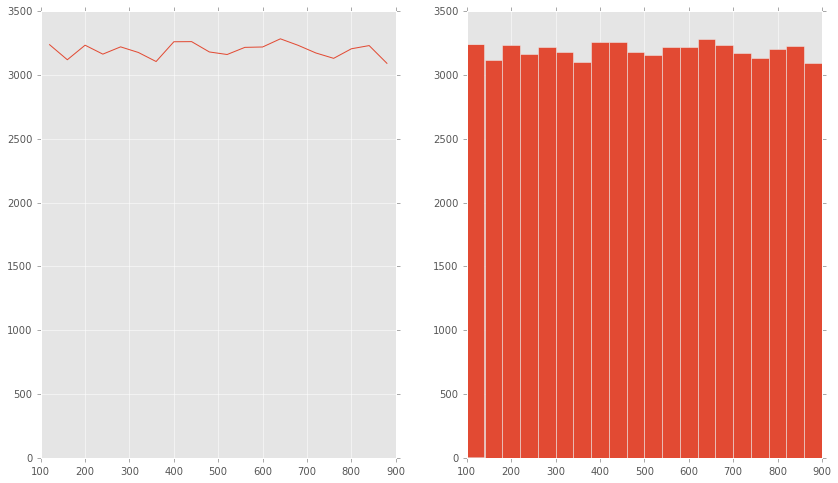

In [67]:
def my_hist(values,edges, under_bins = -1000, over_bins = -999):
    """
    Histogram a vector of values into bins marked by edges
    
    Parameters
    ----------
    
    values: vector or list (float or int)
        values to be binned
    edges: vector or list of bin edges (float or in)
        left and right edges of each bin
    under_bins: float or int
        bin value to assign to values < smallest bin
    over_bins: float or int
        bin_value to assign to values > largest bin
        
    Returns
    -------
    
    bin_centers: list (float)
        centers of each bin, with under_bins,over_bins prepended
    hist_out: list (int)
        number of counts in each bin, in same order as bin_centers
        
    Example
    -------
     
     >>> bin_edges=[1,2,3,4,5,6,7]
     >>> values=[-1, -2, 3.5,2.5,2.7,4.8]
     >>> my_hist(values,bin_edges)
     >>> ([-1000, -999, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5], [2, 2, 1, 1])
    """
    values=np.asarray(values)
    edges = np.asarray(edges)
    edges.sort()
    #
    # find the left and rightmost edges
    #
    left_edge = edges[0]
    right_edge = edges[-1]
    out_bin_list = []
    #
    # loop through the values, finding the bin edge that
    # is just to the left of the left of the data value
    for a_value in values:
        if a_value < left_edge:
            out_bin_list.append(under_bins)
        elif a_value > right_edge:
            out_bin_list.append(over_bins)
        else:
           for index,bin_edge in enumerate(edges):
                if bin_edge > a_value:
                    out_bin_list.append(index)
                    break
    count_dict={}
    for index_val in out_bin_list:
        if index_val in count_dict:
            count_dict[index_val]+=1
        else:
            count_dict[index_val]=1
    bin_centers = list((edges[1:] + edges[0:-1])/2.)
    bin_centers.insert(0,under_bins)
    bin_centers.insert(1,over_bins)
    keys = list(count_dict.keys())
    keys.sort()
    hist_out = []
    for the_key in keys:
        hist_out.append(count_dict[the_key])
    return bin_centers,hist_out   
    
        
%matplotlib inline
plt.close('all')
bin_edges = np.linspace(100,900,21,endpoint=True)
bin_centers,hist_out = my_hist(values,bin_edges)
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,8))
ax1.plot(bin_centers[2:],hist_out[2:])
ax2.hist(values,bins=bin_edges)
ax1.set(ylim=[0,3500])